<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_DNN_BMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요 

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  # 모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/"  ### [중요!!] Colab의 경우, bmi.csv를 저장할 위치를 기록하시오.
df = pd.read_csv(dir + "bmi.csv")    ### [중요!!] https://github.com/jjyjung/ai/blob/gh-pages/bmi.csv 에서 다운받을 수 있습니다.

In [ ]:
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [ ]:
# 몸무게와 키 데이터
df["weight"] /= 100   # normalization
df["height"] /= 200   # normalization
# X = df[["weight", "height"]].to_numpy()
X = df.iloc[:,0:2]

# 레이블링, 라벨링 (labelling) => one-hot encoding
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))     # 2000x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["label"]):
    y[i] = bclass[v]        # "thin'이면, y[i]=[1,0,0] 와 같이 할당
    
# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:15000], y[0:15000]
X_test,  y_test  = X[15000:20000], y[15000:20000]

In [ ]:
# 모델 구조 정의하기
model = tf.keras.Sequential()         # 순차적 계층화 준비
model.add(layers.Dense(8, input_shape=(2,)))  # 입력 2개로부터 전달받는 8개 노드의 layer 생성
model.add(layers.Activation('relu'))  # ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))        # dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))            # 4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))# 분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  # 다중 교차엔트로피
    optimizer="rmsprop",   # 최적화 기법 중 하나
    metrics=['accuracy',tf.keras.metrics.TruePositives(name='tp'), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [ ]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=100,     # 100개에 한 번씩 업데이터 실행
    epochs=5,          # 훈련 데이터셋을 총 60회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.2,  
        #validation data 분할 비율. 즉, 15000개 중에서 10%인 1500개를 validation용으로 분할
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],  
        #'val_loss'를 monitor하여 감소하면 한 번 더 참고 조기중지
    verbose=1)   # 전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/5
120/120 [==============================] - 2s 6ms/step - loss: 1.0276 - accuracy: 0.5562 - tp: 423.0000 - precision_2: 0.9156 - auc_1: 0.7042 - val_loss: 0.9834 - val_accuracy: 0.6707 - val_tp: 35.0000 - val_precision_2: 1.0000 - val_auc_1: 0.8350
Epoch 2/5
120/120 [==============================] - 0s 2ms/step - loss: 0.9601 - accuracy: 0.5848 - tp: 1755.0000 - precision_2: 0.9046 - auc_1: 0.7775 - val_loss: 0.8999 - val_accuracy: 0.6720 - val_tp: 398.0000 - val_precision_2: 1.0000 - val_auc_1: 0.8843
Epoch 3/5
120/120 [==============================] - 0s 2ms/step - loss: 0.8741 - accuracy: 0.6198 - tp: 3675.0000 - precision_2: 0.8939 - auc_1: 0.8319 - val_loss: 0.8002 - val_accuracy: 0.7287 - val_tp: 1193.0000 - val_precision_2: 0.9925 - val_auc_1: 0.9215
Epoch 4/5
120/120 [==============================] - 0s 2ms/step - loss: 0.7920 - accuracy: 0.6516 - tp: 5153.0000 - precision_2: 0.8752 - auc_1: 0.8647 - val_loss: 0.7065 - val_accuracy: 0.7760 - val_tp: 1581.0000 - val_

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'true_negatives', 'precision_1', 'auc', 'val_loss', 'val_accuracy', 'val_true_negatives', 'val_precision_1', 'val_auc'])

In [ ]:
score

[0.8275438547134399, 0.7337999939918518, 10000.0, 1.0, 0.9324871301651001]

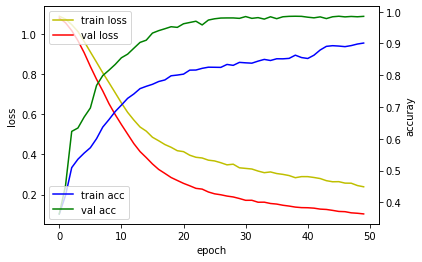

In [ ]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1

In [ ]:
model.get_weights()

[array([[-0.67352486, -0.34398004,  1.2545884 , -0.8692215 , -1.1486601 ,
         -0.7234064 , -0.20266138,  0.04205513],
        [ 0.3621248 , -0.63950455, -0.6521139 ,  1.0222455 ,  0.87438256,
          0.569968  ,  0.19001971, -0.40430203]], dtype=float32),
 array([ 0.        ,  0.        , -0.52038765,  0.239271  ,  0.5183224 ,
         0.3311588 , -0.02903919,  0.        ], dtype=float32),
 array([[-0.47352892, -0.3453966 ,  0.08944708, -0.44224182],
        [ 0.30195266,  0.06255555,  0.01159322,  0.42897302],
        [-0.7342224 , -1.730703  ,  0.475729  ,  5.097929  ],
        [ 2.1295362 ,  0.49783325, -1.7099224 , -0.79870015],
        [ 3.4659984 ,  0.3699495 , -4.7332554 , -1.3120097 ],
        [ 3.5451312 ,  0.7177099 , -4.111153  , -1.7139728 ],
        [-0.22150202, -0.6446472 , -0.5749154 , -0.6644823 ],
        [-0.20450765,  0.09822321, -0.4539123 , -0.3459838 ]],
       dtype=float32),
 array([0.0326903 , 0.11541695, 0.3364553 , 0.63071144], dtype=float32),
 array(

In [ ]:
model.save(dir+"dnn_bmi.h5")
print("Saved model to disk.")

from numpy import loadtxt
from tensorflow.python.keras.models import load_model

# 저장된 모델 읽어오기
loaded_model = load_model(dir+"dnn_bmi.h5")
model.summary()

# 모델을 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None,

In [ ]:
# X_test 샘플들의 클래스 예측하기
y_prob = model.predict(X_test)    # X_test의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # X_test의 클래스 예측하기
y_class

[[3.46520801e-06 1.08444154e-01 8.91552329e-01]
 [9.70973372e-01 2.90240087e-02 2.69537873e-06]
 [3.27941077e-03 9.89507139e-01 7.21349660e-03]
 ...
 [9.96294200e-01 3.70578608e-03 3.53705287e-10]
 [9.92892385e-01 7.10765598e-03 5.89149440e-09]
 [7.42753255e-05 5.79252362e-01 4.20673251e-01]]


array([2, 0, 1, ..., 0, 0, 1])

In [ ]:
# 새로운 샘플의 클래스 예측하기
X_new = [80, 175]
X_new[0]/=100; X_new[1]/=200
print(X_new)

y_prob = model.predict([X_new]) # X_new의 출력값 확인하기
y_pred = y_prob.argmax()        # X_new의 클래스 예측하기
print(y_prob, y_pred)

[0.8, 0.875]
[[3.3977762e-10 1.8744016e-02 9.8125595e-01]] 2


In [ ]:
type(X_test)

pandas.core.frame.DataFrame

In [ ]:
X_test.head()

,height,weight
15000,0.690,0.55
15001,0.760,0.36
15002,0.915,0.72
15003,0.990,0.51
15004,0.745,0.47


In [ ]:
X_test.head(5).index.tolist()

[15000, 15001, 15002, 15003, 15004]

In [ ]:
X_test0 = X_test.loc[15000]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[0.69, 0.55]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

height    0.69
weight    0.55
Name: 15000, dtype: float64

[[3.46520801e-06 1.08444154e-01 8.91552329e-01]] 2


In [ ]:
def predict_bmi(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')

In [ ]:
X_mean = [X_train["height"].mean(), X_train["weight"].mean()]
X_min = [X_train["height"].min(), X_train["weight"].min()]
X_max = [X_train["height"].max(), X_train["weight"].max()]
X_min_max = [X_train["height"].min(), X_train["weight"].max()]
X_max_min = [X_train["height"].max(), X_train["weight"].min()]

predict_bmi(X_mean)
predict_bmi(X_min)
predict_bmi(X_max)
predict_bmi(X_min_max)
predict_bmi(X_max_min)

[0.7999703333333333, 0.5757626666666668]	[[0.00357754 0.96972185 0.02670055]]	1
[0.6, 0.35]	[[0.0007842 0.5345584 0.4646574]]	1
[1.0, 0.8]	[[1.0898369e-02 9.8812824e-01 9.7337656e-04]]	1
[0.6, 0.8]	[[2.0709071e-13 4.5383973e-03 9.9546164e-01]]	2
[1.0, 0.35]	[[9.9768877e-01 2.3112965e-03 4.6207344e-11]]	0
